In [22]:
import sys
import warnings
from hmmlearn import hmm
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)

In [23]:
data = np.load('rolls.npy')
train = data[:data.shape[0] // 2]
valid = data[data.shape[0] // 2:]

In [24]:
import numpy as np
from sklearn.utils import check_random_state
from hmmlearn import hmm

start_probs = np.array([1.0, 0.0])
probabilities = [
    [0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.3, 0.3, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.4, 0.2, 0.1],
]

np.random.seed(13)
random_state = check_random_state(13)
probabilities = random_state.dirichlet(np.ones(6), size=50)

best_probs = None
best_score = None
best_model = None

for i, probs in enumerate(probabilities):
    temp = np.full((6,), 1/6)
    emission_probs = np.array([temp, probs])
    model = hmm.CategoricalHMM(n_components=2, random_state=13)
    model.init_params = 't'
    model.startprob_ = start_probs
    model.emissionprob_ = emission_probs
    
    model.fit(train)
    score = model.score(valid)
    print(f'Model: {i + 1} Validation Score: {score}')
    
    if best_score is None or score > best_score:
        best_score = score
        best_model = model
        best_probs = emission_probs

print(f'Best model\n Initial Emission Probabilities: {emission_probs} Validation Score: {best_score}')


Model: 1 Validation Score: -43180.116445848435
Model: 2 Validation Score: -43181.5410496305
Model: 3 Validation Score: -43183.2054566299
Model: 4 Validation Score: -43170.50902764757
Model: 5 Validation Score: -43172.524149448465
Model: 6 Validation Score: -43173.94614264155
Model: 7 Validation Score: -43177.36617312016
Model: 8 Validation Score: -43183.65143689056
Model: 9 Validation Score: -43175.36586824731
Model: 10 Validation Score: -43182.55579947923
Model: 11 Validation Score: -43181.869616659416
Model: 12 Validation Score: -43146.834337869885
Model: 13 Validation Score: -43182.53761032723
Model: 14 Validation Score: -43183.23603583036
Model: 15 Validation Score: -43177.45841351089
Model: 16 Validation Score: -43178.00584525121
Model: 17 Validation Score: -43167.36029422893
Model: 18 Validation Score: -43177.95715442283
Model: 19 Validation Score: -43183.26712974214
Model: 20 Validation Score: -43182.50947339914
Model: 21 Validation Score: -43178.79078419242
Model: 22 Validation

In [25]:
# Most likely sequence of switching between fair dice and loaded dice -- Transition matrix
print(best_model.transmat_.round(3))

[[0.644 0.356]
 [0.549 0.451]]


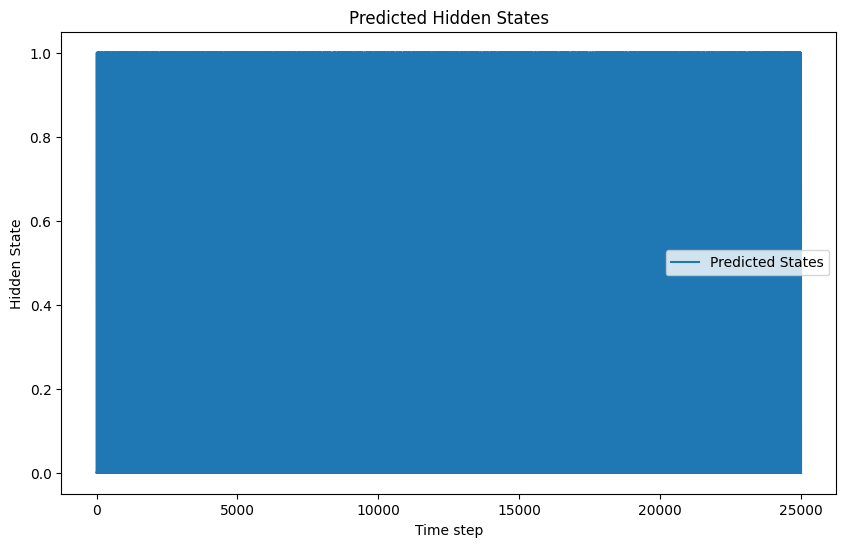

In [26]:
# Plot the generated states
states = best_model.predict(valid)
plt.figure(figsize=(10, 6))
plt.step(range(len(states)), states, label='Predicted States', where='mid')
plt.xlabel('Time step')
plt.ylabel('Hidden State')
plt.title('Predicted Hidden States')
plt.legend()
plt.show()

# Task 3.4.2:

- Predicting the hidden states on the validation set and printing the most likely sequence corresponds to solving the decoding problem.
- The HMM model has already been trained on the training set, and now we want to apply it to the validation set to predict the hidden states.
- Solving the decoding problem in HMM involves finding the most likely sequence of hidden states given a sequence of observed data

In [28]:
# Switch between the fair and loaded dice
def count_switches(states):
    ftol_count, ltof_count = 0, 0
    prev_state = states[0]

    for current_state in states[1:]:
        if prev_state == 0 and current_state == 1:
            ftol_count += 1
        if prev_state == 1 and current_state == 0:
            ltof_count += 1
        prev_state = current_state

    return ftol_count, ltof_count

ftol, ltof = count_switches(states)

print(f'Switches from fair to loaded dice: {ftol}')
print(f'Switches from loaded to fair dice: {ltof}')

Switches from fair to loaded dice: 4472
Switches from loaded to fair dice: 4472


- The task 3.4.3 corresponds to learning problem in HMM as the focus is on understanding how often transitions occur between different hidden states. This implies determining the transition probabilities between states based on the provided dataset.
The frequency of transitions helps in learning the dynamics of the system. For example, it might reveal whether there is a tendency to stay in the same state or transition to a different state.

In [29]:
# Bias of the loaded dice
print(best_model.emissionprob_.round(3))

[[0.144 0.111 0.051 0.081 0.145 0.469]
 [0.129 0.179 0.274 0.221 0.132 0.065]]


- This bias is reflected in the emission probabilities.
- For loaded dice, the emission probabilities suggest that when the hidden state corresponds to the loaded dice, there is a higher probability of getting a 3 and a lower probability of getting a 6.

### The task corresponds to learning problem in HMM
- The learning problem in HMM involves estimating the model parameters from the observed data. In our case, it's about learning the emission probabilities that characterize the behavior of the loaded dice.
- During the learning process, the HMM model is trained on the given dataset, and the parameters, including emission probabilities, are adjusted to maximize the likelihood of the observed data.

In [30]:
# Task 3.4
data = np.load('runs.npy')

initial_probs = np.array([0.5, 0.5])
transition_probs = np.array([[0.7, 0.3], [0.3, 0.7]])
emission_probs = np.array([[0.1, 0.3, 0.25, 0.1, 0.2, 0.0, 0.05], [0.2, 0.15, 0.1, 0.05, 0.25, 0.0, 0.25]])

num_iterations = 50
best_score, best_model = float('-inf'), None

for _ in range(num_iterations):
    model = hmm.CategoricalHMM(n_components=2, init_params='')
    model.startprob_, model.transmat_, model.emissionprob_ = initial_probs, transition_probs, emission_probs

    score = model.fit(data).score(data)
    if score > best_score:
        best_score, best_model = score, model

states = best_model.predict(data)
print(f'Best Score: {best_score}')
print('Transition Matrix:\n', best_model.transmat_.round(3))
print('Emission Probabilities:\n', best_model.emissionprob_.round(3))
print('Start Probabilities:\n', best_model.startprob_.round(3))

first_ball_player = 'Virat' if states[0] == 0 else 'Rohit'
last_ball_player = 'Virat' if states[-1] == 0 else 'Rohit'

print(f'First ball Player: {first_ball_player}')
print(f'Last ball Player: {last_ball_player}')


Best Score: -50998.50187692966
Transition Matrix:
 [[0.664 0.336]
 [0.281 0.719]]
Emission Probabilities:
 [[0.114 0.291 0.264 0.06  0.199 0.    0.072]
 [0.135 0.125 0.104 0.038 0.3   0.    0.298]]
Start Probabilities:
 [0.916 0.084]
First ball Player: Virat
Last ball Player: Rohit
